In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

from urllib import request

#### <span style="color:blue"> 1. Download do Dataset do Portal de Dados Abertos </span>

In [2]:
file_url = 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/cmo_tm/CMO_SEMIHORARIO_2022.csv'
source_file = 'CMO_SEMIHORARIO_2022.csv'
request.urlretrieve(file_url , source_file )

('CMO_SEMIHORARIO_2022.csv', <http.client.HTTPMessage at 0x220e3cd93d0>)

#### <span style="color:blue"> 2. Importar arquivo </span>

In [3]:
dataframe = pd.read_csv(source_file, sep=';',encoding = "utf-8", parse_dates=['din_instante'])

#### <span style="color:blue">3. Info do Dataframe </span>

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53952 entries, 0 to 53951
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_subsistema   53952 non-null  object        
 1   nom_subsistema  53952 non-null  object        
 2   din_instante    53952 non-null  datetime64[ns]
 3   val_cmo         53952 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.6+ MB


In [5]:
# FORMA >> (Linha x Colunas)
dataframe.shape

(53952, 4)

In [6]:
# Colunas do cabeçalho
dataframe.columns 

Index(['id_subsistema', 'nom_subsistema', 'din_instante', 'val_cmo'], dtype='object')

#### <span style="color:blue">4. Estatisticas do Dataframe </span>

In [7]:
dataframe.groupby('id_subsistema').count()

,nom_subsistema,din_instante,val_cmo
id_subsistema,,,
N,13488,13488,13488
NE,13488,13488,13488
S,13488,13488,13488
SE,13488,13488,13488


<AxesSubplot: >

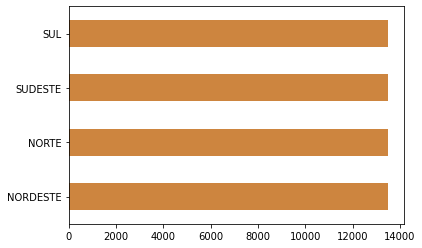

In [8]:
dataframe.nom_subsistema.value_counts().plot(kind='barh',color="#CD853F")

#### <span style="color:blue">5. Grafico de Série temporal do Sudeste </span>

In [9]:
query = ['S']
df = dataframe['id_subsistema'].isin(query)   # Somente para verificar o resultado
df_resultado = dataframe[df]

In [10]:
df_resultado.head(2)

,id_subsistema,nom_subsistema,din_instante,val_cmo
3,S,SUL,2022-01-01 00:00:00,59.21
7,S,SUL,2022-01-01 00:30:00,58.47


In [11]:
df_resultado = df_resultado.drop(columns=['nom_subsistema'])

In [12]:
df_resultado.head(2)

,id_subsistema,din_instante,val_cmo
3,S,2022-01-01 00:00:00,59.21
7,S,2022-01-01 00:30:00,58.47


#### <span style="color:blue">5. Distribuição dos valores de CMO </span>

Text(0, 0.5, 'Contagem')

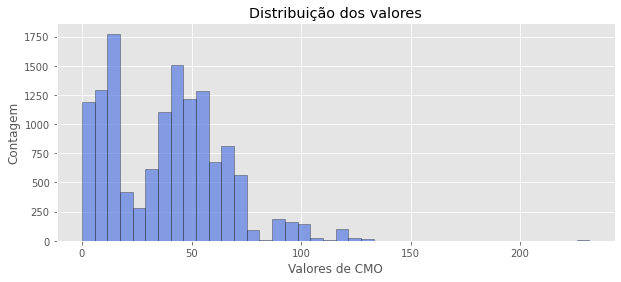

In [13]:
plt.style.use("ggplot")
plt.figure(figsize = (10,4))
df_resultado["val_cmo"].hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição dos valores")
plt.xlabel("Valores de CMO")
plt.ylabel("Contagem")

In [14]:
# Encontrando "Dado Estranho"
df2=df_resultado.query("val_cmo > 200")
print(df2)

     id_subsistema        din_instante  val_cmo
4343             S 2022-01-25 14:30:00   229.26
4347             S 2022-01-25 15:00:00   230.73
4351             S 2022-01-25 15:30:00   231.50
4355             S 2022-01-25 16:00:00   229.26


#### <span style="color:blue">6. Serie Temporal </span>

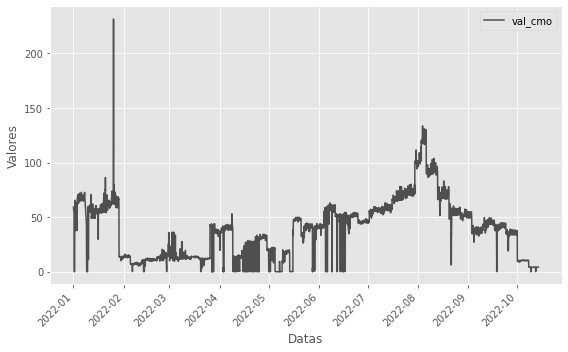

In [16]:
df_grafico = df_resultado.set_index('din_instante')

df_grafico.plot(figsize=(8,5),color='#4F4F4F')
plt.xticks(rotation=45)
plt.xlabel('Datas')
plt.ylabel('Valores')
plt.tight_layout()

In [ ]:
df_grafico.head(5)

#### <span style="color:blue">7. Exportar resultados</span>

In [ ]:
df_grafico.to_csv("resultado_S.csv", encoding = 'utf-8')